# Aula 8 - Tutorial

## Sobreajuste, Reamostragem e Validação dos Dados

Vamos começar importando os principais pacotes e o banco de dados.

In [60]:
from sklearn.linear_model import LogisticRegression # Modelo de regressão logística do sklearn
from sklearn.model_selection import train_test_split # Função para dividir o banco entre treino e teste
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Algumas métricas e relatórios
import random
import re # Biblioteca de regular expressions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize # Tokenizador do nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')
# Importando o Vetorizador do sklearn
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
url = "https://github.com/NUPRAM/CoViD-Pol/raw/main/Covid-Pol_Corpus_v2.0.csv"

# Carrega o arquivo Excel em um DataFrame
df_ex = pd.read_csv(url)

df_ex.head()

,Unnamed: 0,id,tweet_id,post_date,content,relevant,final_stance,final_sentiment,final_children
0,0,523,A522,2020-09-15,"A cabeça pensa onde o pé pisa. Quem governa de dentro do escritório com ar-condicionado não conhece o dia-a-dia das escolas em POA. O protocolo de volta às aulas de Marchezan, como diz @ProfAlexFraga, é miserável e coloca a vida de alunos e professores em risco. #SemVacinaSemAula",True,favorable,negative,true
1,1,458,A457,2020-11-20,"Sarto vai fazer um grande Programa de Enfrentamento à Pandemia, vai garantir a vacina da Covid e muito mais! 🤝\n\nConfira o programa de hoje: #Fortaleza #CaminhandoJuntos #ComForçaECoragem #Sarto12 #FortalezaCadaVezMelhor #TrabalhoSério",True,favorable,positive,false
2,2,446,A445,2020-12-18,A Câmara dos Deputados votou hoje a MP que trata da adesão do Brasil à Aliança de Vacinação contra a Covid. O @psol50 encaminhou voto favorável à vacina. Nosso partido defende que o negacionismo de Bolsonaro é um projeto de uma sociedade movida pelo ódio e precisa ser derrotado.,True,favorable,negative,false
3,3,547,A546,2020-11-10,Tirar Bolsonaro do poder é uma questão de vida ou morte. Um presidente que impede testes para produção de uma vacina por pura guerra ideológica e que zomba da dor do povo precisa ser retirado imediatamente do poder. #ForaBolsonaro #impeachmentDeBolsonaro #bolsonarogenocida,True,favorable,negative,false
4,4,848,A847,2020-09-24,"E a LIESA decidiu adiar os desfiles do #CarnavalRJ. Sem data, não dá para pensar em sambódromo sem a esperada vacina. Agora é olhar pros profissionais do Carnaval, que precisam de apoio até o fim da pandemia. #DelegadaMarthaRocha #CarnavalRiodeJaneiro",True,favorable,negative,false


## Validação dos resultados



A validação dos resultados em um contexto de machine learning é uma etapa crítica para avaliar o desempenho do modelo e garantir que ele seja capaz de generalizar bem para novos dados não vistos. Esta etapa é essencial para verificar se o modelo está funcionando como esperado e se está apto para cumprir sua finalidade, seja classificar, prever ou realizar qualquer outra tarefa. Existem várias técnicas de validação de resultados em machine learning, e hoje trabalharemos as mais comuns.

### Divisão entre banco de dados de treinamento e o banco de teste.

A primeira técnica de validação, a Divisão de Dados (Train-Test Split), é uma abordagem fundamental e geralmente a mais simples para avaliar o desempenho de um modelo de machine learning. Nessa técnica, o conjunto de dados é dividido em dois subconjuntos: o conjunto de treinamento (train) e o conjunto de teste (test). Aqui estão alguns detalhes adicionais e considerações a serem levadas em conta ao usar essa técnica:

* **Divisão dos Dados**: Inicialmente, o conjunto de dados é dividido em duas partes: uma que será usada para treinar o modelo (conjunto de treinamento) e outra que será usada para avaliar o desempenho do modelo (conjunto de teste).

* **Tamanho do Conjunto de Teste**: A escolha do tamanho do conjunto de teste é um ponto crítico. Um tamanho comum é a divisão 70/30 ou 80/20, onde 70% ou 80% dos dados são usados para treinamento e o restante para teste. No entanto, essa divisão pode variar dependendo do tamanho do conjunto de dados e da natureza do problema. Em conjuntos de dados maiores, é possível alocar uma porcentagem menor para o conjunto de teste, pois há mais dados para treinamento. Em conjuntos de dados pequenos, pode ser necessário reservar uma porcentagem maior para o conjunto de teste para obter uma estimativa confiável do desempenho.

* **Aleatoriedade**: A aleatoriedade desempenha um papel importante. Os dados devem ser divididos aleatoriamente entre os conjuntos de treinamento e teste para evitar qualquer viés na seleção dos exemplos. A função de divisão aleatória geralmente está disponível em bibliotecas de machine learning, como scikit-learn em Python.

* **Garantir a Representatividade**: Ao dividir os dados, é fundamental garantir que ambos os conjuntos de treinamento e teste sejam representativos da distribuição geral dos dados. Isso significa que a proporção de diferentes classes ou características deve ser mantida em ambos os conjuntos.

* **Validação Múltipla**: Para obter uma estimativa mais confiável do desempenho, é uma prática comum realizar várias divisões de treinamento/teste, calculando métricas de avaliação (como precisão, recall, etc.) em cada divisão. Isso ajuda a reduzir a variância introduzida pela aleatoriedade na seleção dos dados.

* **Overfitting e Subajuste (Overfitting and Underfitting)**: A Divisão de Dados ajuda a detectar problemas de overfitting (sobreajuste) e subajuste (subestimativa) do modelo. Se o modelo tem um desempenho excelente no conjunto de treinamento, mas muito pior no conjunto de teste, ele pode estar sofrendo de overfitting, o que significa que está se ajustando em excesso aos dados de treinamento e não generaliza bem para novos dados. Se o desempenho é ruim em ambos os conjuntos, pode ser um caso de subajuste, onde o modelo é muito simples para capturar a complexidade do problema.

Em resumo, a Divisão de Dados é uma técnica simples, mas é importante fazer a divisão dos dados de forma aleatória e representativa. A escolha do tamanho do conjunto de teste deve ser feita com base no tamanho do conjunto de dados e na necessidade de obter uma estimativa precisa do desempenho do modelo. É uma boa prática realizar validações múltiplas para obter métricas mais robustas e identificar problemas de overfitting ou subajuste.

#### Exemplo

Na última aula, já rodamos o primeiro exemplo de classificação com modelos de aprendizado de máquina utilizando a divisão entre treino/teste, mas não tinhamos comentado muito sobre isso. Vamos trabalhar cada um dos exemplos de validação dos resultados.


**Banco de Dados**

Vamos retomar o exemplo dos nossos tweets, treinando um modelo de Relevância

In [62]:
def condicao(x):
    if x == True:
        return 1
    elif x == False:
        return 0
    else:
        return 0


df_ex['relevant'] = df_ex['relevant'].apply(condicao)


In [63]:
df_ex['relevant'].value_counts()

,count
relevant,
1,5962
0,3283


Vamos processar a coluna de texto novamente

In [64]:
# Criando uma função de pré-processamento

def preprocess_text(texto):
    # Use uma expressão regular para encontrar e remover URLs
    texto = re.sub(r'https://\S+', '', texto)

    # Remover quebra de linha
    texto = texto.replace('\\n', ' ')

    # Remover Hashtags
    texto = re.sub(r'#(\w+)', r'\1', texto)

    # Deixar todas as letras minúsculas
    texto = texto.lower()

    # Selecionar apenas letras
    texto = re.findall(r'[a-zéóáêâãõç]+', texto)

    # Juntar o texto, já que o .findall separa em tokens
    texto = " ".join(texto)

    return texto

# Criando a nova coluna transformada
df_ex["texto_processado"] = df_ex['content'].apply(preprocess_text)

pd.set_option('display.max_colwidth', None) # Para mostrar a coluna inteira

# Imprimindo
df_ex[['content','texto_processado']]

,content,texto_processado
0,"A cabeça pensa onde o pé pisa. Quem governa de dentro do escritório com ar-condicionado não conhece o dia-a-dia das escolas em POA. O protocolo de volta às aulas de Marchezan, como diz @ProfAlexFraga, é miserável e coloca a vida de alunos e professores em risco. #SemVacinaSemAula",a cabeça pensa onde o pé pisa quem governa de dentro do escritório com ar condicionado não conhece o dia a dia das escolas em poa o protocolo de volta s aulas de marchezan como diz profalexfraga é miserável e coloca a vida de alunos e professores em risco semvacinasemaula
1,"Sarto vai fazer um grande Programa de Enfrentamento à Pandemia, vai garantir a vacina da Covid e muito mais! 🤝\n\nConfira o programa de hoje: #Fortaleza #CaminhandoJuntos #ComForçaECoragem #Sarto12 #FortalezaCadaVezMelhor #TrabalhoSério",sarto vai fazer um grande programa de enfrentamento pandemia vai garantir a vacina da covid e muito mais confira o programa de hoje fortaleza caminhandojuntos comforçaecoragem sarto fortalezacadavezmelhor trabalhosério
2,A Câmara dos Deputados votou hoje a MP que trata da adesão do Brasil à Aliança de Vacinação contra a Covid. O @psol50 encaminhou voto favorável à vacina. Nosso partido defende que o negacionismo de Bolsonaro é um projeto de uma sociedade movida pelo ódio e precisa ser derrotado.,a câmara dos deputados votou hoje a mp que trata da adesão do brasil aliança de vacinação contra a covid o psol encaminhou voto favorável vacina nosso partido defende que o negacionismo de bolsonaro é um projeto de uma sociedade movida pelo ódio e precisa ser derrotado
3,Tirar Bolsonaro do poder é uma questão de vida ou morte. Um presidente que impede testes para produção de uma vacina por pura guerra ideológica e que zomba da dor do povo precisa ser retirado imediatamente do poder. #ForaBolsonaro #impeachmentDeBolsonaro #bolsonarogenocida,tirar bolsonaro do poder é uma questão de vida ou morte um presidente que impede testes para produção de uma vacina por pura guerra ideológica e que zomba da dor do povo precisa ser retirado imediatamente do poder forabolsonaro impeachmentdebolsonaro bolsonarogenocida
4,"E a LIESA decidiu adiar os desfiles do #CarnavalRJ. Sem data, não dá para pensar em sambódromo sem a esperada vacina. Agora é olhar pros profissionais do Carnaval, que precisam de apoio até o fim da pandemia. #DelegadaMarthaRocha #CarnavalRiodeJaneiro",e a liesa decidiu adiar os desfiles do carnavalrj sem data não dá para pensar em sambódromo sem a esperada vacina agora é olhar pros profissionais do carnaval que precisam de apoio até o fim da pandemia delegadamartharocha carnavalriodejaneiro
...,...,...
9240,"Na área de ciência e tecnologia, garantimos recursos para a difusão do conhecimento científico, evitando que o Governo Bolsonaro corte o orçamento de importantes órgãos de pesquisa como a EMBRAPA, a FIOCRUZ, o IPEA e o IBGE.",na área de ciência e tecnologia garantimos recursos para a difusão do conhecimento cient fico evitando que o governo bolsonaro corte o orçamento de importantes órgãos de pesquisa como a embrapa a fiocruz o ipea e o ibge
9241,"No dia mundial de conscientização do autismo renovamos nosso compromisso com a qualidade de vida e a luta pelo respeito e igualdade que devemos travar em favor destas pessoas. No Brasil, são mais de 2 milhões de... https://t.co/hvQogghgof",no dia mundial de conscientização do autismo renovamos nosso compromisso com a qualidade de vida e a luta pelo respeito e igualdade que devemos travar em favor destas pessoas no brasil são mais de milhões de
9242,"O gov Bolsonaro cortou 30% dos recursos da educação, deixou universidades e IFs em iminente paralisia e agora quer vender o desbloqueio como um grande feito. Ainda tem 3,8 bilhões de recursos bloqueados e a luta contra esse governo inimigo da educação tem que seguir!",o gov bolsonaro cortou dos recursos da educação deixou universidades e ifs em iminente paralisia e agora quer vender o desbloqueio como um grande feito ainda tem bilh

vamos extrair as colunas para treinamento

In [65]:
texto = df_ex['texto_processado']
relevance_dummy = df_ex['relevant']

**Divisão Treino/Teste**

In [66]:
# Desempacotando cada parte com o train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(texto, # Vetor de variáveis explicativas
                                                        relevance_dummy, # Target (Ou Var. Dep.)
                                                        test_size=0.2, # Porcentagem que vai ficar para teste (20%)
                                                        random_state=42) # Seed para garantir a estabilidade dos resultados
# Imprimindo o array dos features de treino
X_treino

,texto_processado
1053,a venda da cloroquina e hidroxicloroquina nas farmácias aumentou em maio depois da mudança na orientação do ministério da sa de para uso no tratamento de pacientes contaminados pelo coronavirus ontem a oms voltou a autorizar teste com a medicação
8229,vacine se não somente para proteção individual vacina se por todos é sobre a coletividade sobre cidadania é disso que estamos falando confira o artigo completo sobre o assunto escrito pelo diretor da sbim renato kfouri para a veja sa de
5267,grav ssimo a advogada bruna morato diz que a prevent buscou dar lastro ao tratamento precoce que era do interesse do ministério da economia em troca a empresa não seria fiscalizada pelos órgãos de controle e teria a publicidade da cura milagrosa que não salvou ninguém
6901,excelente not cias para os quarentões a prefeiturapmf inicia nesta terça feira a aplicação da quarta dose da vacina contra a covid na população a partir de anos então se já recebeu a terceira dose há pelo menos quatro meses vá se vacinar
6361,queiroga reage a lula governo bolsonaro é contra o aborto
...,...
5734,vamos de avanço na vacinação contra covid liberamos o reforço dose para pessoas com que tomaram reforço dose há mais de dias já começa amanhã agora você pode ir direto a um dos locais que agora vacinam por demanda espontânea ou agendar
5191,deputadobacelar questiona bolsonaro quanto tempo para colocar a vacina para quem precisa
5390,na audiência p blica com o min da sa de marcelo queiroga tornei a defender a prioridade dos mais pobres na vacinação contra a covid cobrei posição sobre tratamento precoce kit cloroquina questionei sobre a fakenews do bolsonaro do desvio recurso pelos governadores veja
860,a prefeitura de curitiba confirmou a decisão de compra da coronavac a vacina do butantan e parceria com o laboratório sinovac vamos prioritariamente imunizar todos os profissionais de sa de e pessoas da linha de frente do nosso munic pio


In [67]:
# Imprimindo o target de treino

print(y_treino)

1053    1
8229    1
5267    1
6901    1
6361    0
       ..
5734    1
5191    1
5390    1
860     1
7270    1
Name: relevant, Length: 7396, dtype: int64


Checando a distribuição das classes

In [68]:
y_treino.value_counts()

,count
relevant,
1,4753
0,2643


**OBSERVAÇÃO IMPORTANTE**

A transformação da coluna de texto em bag-of-words só deve ser feita após a separação dos bancos entre treino e teste. Isso deve ser feito deste jeito pois o modelo pode adquirir informações do banco de teste durante o treinamento caso este processamento (BOW) seja feito antes da divisão. Isso é conhecido como *Data Leakage* e pode invalidar os resultados do seu modelo.

Transformando o X de treino em Bag-of-Words

In [69]:
# Definindo o dicionário de stop_words
stop_words = stopwords.words('portuguese')

# Criando o vetorizador, utilizando nossa lista de stop_words
vectorizer = CountVectorizer(stop_words=stop_words,
                             ngram_range=(1,1)) # Palavras serão tratadas individualmente (ngram = 1)

# Transformando a coluna de texto em BOW
X_treino = vectorizer.fit_transform(X_treino)

Vamos ver o resultado da vetorização:

In [70]:
df_bow_sklearn = pd.DataFrame(X_treino.toarray())
df_bow_sklearn.head()

,0,1,2,3,4,5,6,7,8,9,...,19829,19830,19831,19832,19833,19834,19835,19836,19837,19838
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Treinando o modelo**

In [71]:
modelo = LogisticRegression() # Modelo de Regressão Logística do SkLearn

# Treinando o modelo
modelo.fit(X_treino, y_treino) # Colocamos os vetores de treino para o modelo utilizando o método '.fit'

LogisticRegression()

**Prevendo os valores do banco de teste**

Novamente, precisamos transformar também o X de teste

**Observação**: Perceba que o comando para transformar o X_teste é diferente do X_treino. Neste, é

```
# vectorizer.fit_transform(X_treino)
```

Ja no banco de teste é

```
# vectorizer.transform(X_teste)
```

Recomendação de [Leitura](https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)


In [72]:
# Transformando os textos de teste em BOW
X_teste = vectorizer.transform(X_teste)

In [73]:
y_pred = modelo.predict(X_teste)


y_pred # Nosso array de previsões

array([1, 0, 1, ..., 1, 1, 1])

**Avaliação do modelo**

In [74]:
rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       640
           1       0.96      0.96      0.96      1209

    accuracy                           0.95      1849
   macro avg       0.94      0.95      0.95      1849
weighted avg       0.95      0.95      0.95      1849



Obtivemos um excelente resultado com o modelo logístico na classificação de relevância da publicação. No entanto, dividindo somente entre treino e teste, temos somente uma observação, e não temos muita certeza se o resultado é advindo de aleatoriedade ou bom aprendizado do modelo. Para isto, precisamos de outros métodos que nos garantam que nosso resultado não é mera aleatoriedade estatística.

### Leave-One-Out Cross-Validation (LOOCV)

O "Leave-One-Out Cross-Validation" (LOOCV) é uma variação da validação cruzada que é particularmente útil quando se lida com conjuntos de dados pequenos. Nesse método, o conjunto de dados é dividido em um número de dobras igual ao número de amostras no conjunto de dados, ou seja, cada amostra é usada uma vez como o conjunto de teste, enquanto todas as outras amostras são usadas como conjunto de treinamento. Aqui está uma explicação mais aprofundada do LOOCV:

* **Número de Dobras (*Folds*)**: O número de dobras no LOOCV é igual ao número total de amostras no conjunto de dados. Se você tiver, por exemplo, 100 amostras em seu conjunto de dados, você criará 100 dobras, uma para cada amostra.

* **Processo de Validação**: Para cada dobra, uma única amostra é retida como o conjunto de teste, e as restantes amostras são usadas como o conjunto de treinamento. Isso significa que você treinará e avaliará o modelo 100 vezes, cada vez usando uma amostra diferente como conjunto de teste.

* **Avaliação do Desempenho**: Após cada execução, você registra a métrica de avaliação (por exemplo, precisão, erro quadrático médio, etc.) no conjunto de teste. No final das 100 iterações, você terá 100 métricas de avaliação, uma para cada dobra.

* **Média das Métricas**: Para obter uma estimativa geral do desempenho do modelo, você pode calcular a média das métricas de avaliação coletadas nas 100 iterações. Isso fornece uma medida geral do desempenho do modelo, levando em consideração todas as amostras do conjunto de dados.

**Vantagens do LOOCV**:

O LOOCV fornece uma estimativa robusta do desempenho do modelo, uma vez que todas as amostras no conjunto de dados são usadas como conjuntos de teste em algum momento.
É especialmente útil em conjuntos de dados pequenos, onde a divisão em conjuntos de treinamento/teste convencional pode resultar em conjuntos muito pequenos para treinamento ou teste.

**Desvantagens do LOOCV**:

É computacionalmente caro e demorado, pois requer treinar e avaliar o modelo tantas vezes quanto o número de amostras no conjunto de dados.
Pode ser sensível a ruídos no conjunto de dados, uma vez que o modelo será treinado e testado em pares de dados muito semelhantes.
O LOOCV é uma técnica valiosa quando se lida com conjuntos de dados pequenos, mas pode ser impraticável em conjuntos de dados muito grandes devido ao alto custo computacional. Portanto, a escolha entre LOOCV e outras técnicas de validação cruzada depende do tamanho do conjunto de dados e das necessidades específicas do problema.

#### Exemplo

Vamos trabalhar com o mesmo banco de dados. Antes, vamos importar o LOOCV do Sci-Kit Learn (Recomendação de [leitura](https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/)):

In [75]:
from sklearn.model_selection import LeaveOneOut # Instância do LOOCV

LOOCV = LeaveOneOut() # Salvando como um objeto

In [76]:
# Divide os dados em features (X) e target (y)
X = df_ex['texto_processado']
y = df_ex['relevant']

# Transformar TODO o X em BOW

X = vectorizer.fit_transform(X)



In [77]:
# Número de splits deve ser igual ao tamanho do banco
LOOCV.get_n_splits(X)

9245

Podemos observar que o número de splits é o mesmo que o número de observações no banco, o que era esperado. Uma vez criada, a função split() pode ser chamada e fornecermos o conjunto de dados para o enumerate().

Cada iteração retornará os índices de linha que podem ser usados ​​para os conjuntos de treinamento e teste do conjunto de dados fornecido. Rode a seguinte célula:

In [ ]:
for i, (train_index, test_index) in enumerate(LOOCV.split(X)):
  print(f"Dobra(Fold) {i}:")
  print(f"  Treino: indíces={train_index}")
  print(f"  Teste:  indíces={test_index}")

Observe que o split funciona da seguinte forma: Para cada dobra, deixamos apenas uma observação para teste. Por exemplo, na dobra 9245, deixamos a observação de índice 9245 (a última do banco) para o teste. Agora, vamos treinar um modelo de regressão logística utilizando o LOOCV. Para isso, precisamos de um loop:

**Oservação**: O seguinte loop pode ser assustador em uma primeira vez, mas leia ele com calma (e sua execução vai ser demorada). Se estiver com dúvidas do que acontece na célula completa, releia e pergunte ao monitor. Esse loop será util também posteriormente quando tivermos de usar o PyTorch para modelos de aprendizado profundo, já que não há pacotes (ainda) que facilitem o uso de técnicas de resampling.

In [79]:
# Antes, precisamos ajustar o formato de nossos inputs

y = y.to_numpy()  # Converter o DataFrame y em um array NumPy


# Criando duas listas vazias para salvar os valores reais e preditos
y_true = []
y_pred = []

# Loop de treinamento
for train_index, test_index in LOOCV.split(X):

 # Dividir os dados entre treino e teste para este loop
 X_treino, X_teste = X[train_index, :], X[test_index, :]
 y_treino, y_teste = y[train_index], y[test_index]

 # Treinando o modelo
 modelo = LogisticRegression(random_state=42)
 modelo.fit(X_treino, y_treino)

 # Avaliação do modelo
 yhat = modelo.predict(X_teste)

 # Guardando os valores
 y_true.append(y_teste[0])
 y_pred.append(yhat[0])

# [Fora do Loop] Calculando a accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.955


Você pode acabar recebendo o seguinte warning ao fim da execução

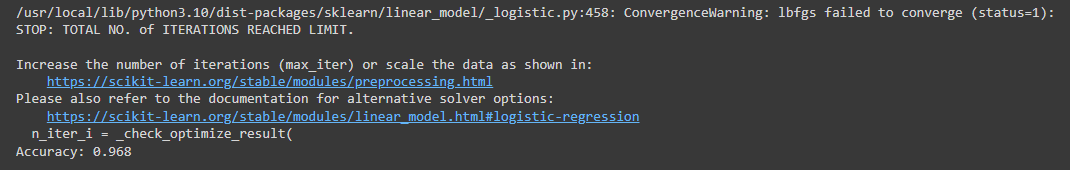

Isso quer dizer, de forma simples, que após um certo número de iterações o resultado não mudou significativamente, e a iteração foi forçada a parar pelo sklearn. Vamos observar o que temos nas listas

In [80]:
print(len(y_pred), len(y_true))

9245 9245


No entanto, não precisamos fazer um loop deste jeito para rodar um LOOCV (pelo menos no scikit learn). Vamos rodar de outra forma a mesma coisa com um banco de dados menor, para reduzir o tempo de execução. Leia também o seguinte documento do [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [81]:
from numpy import mean # Média
from numpy import std # Desvio Padrão
from sklearn.datasets import make_blobs # Para criar bancos de dados fictícios
from sklearn.model_selection import cross_val_score # Pipeline de cross-validation do SKLEARN

# Criando um banco de dados fictício com 100 observações
X_blob, y_blob = make_blobs(n_samples=100, random_state=42)

# Salvando a técnica de LOOCV em uma variável
LOOCV = LeaveOneOut()

# Criando o modelo
modelo = LogisticRegression(random_state = 42)

# evaluate model
scores = cross_val_score(modelo, # 1° - O modelo
                         X_blob, # 2° - Array de feature
                         y_blob, # 3° - Array de Target
                         scoring='f1_macro', # 4° - Métrica a ser utilizada (só pode uma, infelizmente)
                         cv=LOOCV, # 5° - Método de Validação (LOOCV)
                         n_jobs=-1)
# Performance do modelo
print(f'F1-score Macro médio: {mean(scores)}')
print(f'Desvio padrão do F1-Score Macro: {std(scores)}')

F1-score Macro médio: 1.0
Desvio padrão do F1-Score Macro: 0.0


Aplicando para o nosso caso, ficamos com:

In [82]:
# evaluate model
scores = cross_val_score(modelo, # 1° - O modelo
                         X_treino, # 2° - Array de feature
                         y_treino, # 3° - Array de Target
                         scoring='f1_macro', # 4° - Métrica a ser utilizada (só pode uma, infelizmente)
                         cv=LOOCV, # 5° - Método de Validação (LOOCV)
                         n_jobs=-1)
# Performance do modelo
print(f'F1-score Macro médio: {mean(scores)}')
print(f'Desvio padrão do F1-Score Macro: {std(scores)}')

F1-score Macro médio: 0.9551060147122458
Desvio padrão do F1-Score Macro: 0.2070712808979969


**Lista de scorings para o cross_val_score** -> [Link](https://scikit-learn.org/stable/modules/model_evaluation.html)

### K-fold Cross-validation

A validação cruzada k-fold (K-fold cross-validation) é uma técnica de validação comum em machine learning que se diferencia do Leave-One-Out Cross-Validation (LOOCV) em como divide os dados para treinamento e teste. A principal diferença entre essas duas abordagens está na forma como os dados são particionados.

Aqui está uma explicação da validação cruzada k-fold e como ela se relaciona com o LOOCV:

* **Divisão dos Dados**: Em vez de dividir o conjunto de dados com base no número de observações como no LOOCV, na validação cruzada k-fold, o conjunto de dados é dividido em k dobras (ou partições) aproximadamente iguais, onde k é um número escolhido com antecedência. Cada dobra contém uma fração igual dos dados.

* **Loop de Treinamento e Teste**: O modelo é treinado k vezes. Em cada iteração, uma das k dobras é usada como conjunto de teste, enquanto as outras k-1 dobras são usadas como conjunto de treinamento. O processo de treinamento e teste é repetido k vezes, de modo que cada dobra é usada uma vez como conjunto de teste.

* **Métricas de Avaliação**: Em cada iteração, métricas de avaliação, como precisão, erro quadrático médio, etc., são calculadas no conjunto de teste.

* **Resultados Agregados**: No final das k iterações, as métricas de avaliação de cada iteração são geralmente agregadas, geralmente calculando-se a média ou a mediana. Essa média ou mediana representa uma estimativa do desempenho do modelo.


O LOOCV é um caso especial de k-fold cross-validation, onde k é igual ao número de amostras no conjunto de dados. Isso significa que, no LOOCV, cada amostra é usada como um conjunto de teste individualmente, e o modelo é treinado nas outras amostras. Portanto, o LOOCV é uma variação da validação cruzada k-fold, onde k é igual ao número de amostras.


**Vantagens da K-fold Cross-Validation**:

1. É menos intensiva computacionalmente do que o LOOCV, uma vez que o número de iterações é limitado a k.

2. Fornece uma estimativa mais robusta do desempenho do modelo em comparação com uma única divisão de treinamento/teste, uma vez que usa diferentes subconjuntos para treinamento e teste.

3. Pode ser usado eficazmente em conjuntos de dados maiores, onde o LOOCV pode ser impraticável devido ao alto custo computacional.

**Desvantagens da K-fold Cross-Validation**:

1. A escolha do valor de k pode afetar a estimativa do desempenho do modelo. Um valor comum é k = 5 ou k = 10, mas a escolha pode variar dependendo do conjunto de dados e do problema.

2. Como os dados são divididos aleatoriamente em dobras, diferentes execuções do K-fold podem levar a estimativas ligeiramente diferentes do desempenho do modelo.

Em resumo, a validação cruzada k-fold é uma técnica de validação mais eficiente em termos de tempo e recursos computacionais em comparação com o LOOCV, enquanto ainda fornece uma estimativa sólida do desempenho do modelo. O LOOCV é uma variação especial da validação cruzada k-fold onde k é igual ao número de amostras no conjunto de dados. A escolha entre as duas abordagens depende do tamanho do conjunto de dados e das necessidades específicas do problema.

#### Exemplo

Vamos trabalhar com o mesmo banco de dados. Primeiro, importamos a técnica do Sci-kit learn e a salvamos como um objeto do Python

In [83]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10) # O default é 5

# Vamos checar o número de splits
kf.get_n_splits(X)

10

Aqui podemos ver que, diferente do LOOCV, o número de dobras (folds) não depende do tamanho de banco de dados, mas sim de um número pré-estabelecido pelo usuário. Vamos ver como ficaria a divisão do nosso banco de dados

In [84]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Dobra (Fold) {i}:")
  print(f"  Treino: indíces={train_index}")
  print(f"  Teste:  indíces={test_index}")

Dobra (Fold) 0:
  Treino: indíces=[ 925  926  927 ... 9242 9243 9244]
  Teste:  indíces=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224

In [85]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Dobra (Fold) {i}:")
  print(f"  Treino: tamanho={len(train_index)}")
  print(f"  Teste:  tamanho={len(test_index)}")

Dobra (Fold) 0:
  Treino: tamanho=8320
  Teste:  tamanho=925
Dobra (Fold) 1:
  Treino: tamanho=8320
  Teste:  tamanho=925
Dobra (Fold) 2:
  Treino: tamanho=8320
  Teste:  tamanho=925
Dobra (Fold) 3:
  Treino: tamanho=8320
  Teste:  tamanho=925
Dobra (Fold) 4:
  Treino: tamanho=8320
  Teste:  tamanho=925
Dobra (Fold) 5:
  Treino: tamanho=8321
  Teste:  tamanho=924
Dobra (Fold) 6:
  Treino: tamanho=8321
  Teste:  tamanho=924
Dobra (Fold) 7:
  Treino: tamanho=8321
  Teste:  tamanho=924
Dobra (Fold) 8:
  Treino: tamanho=8321
  Teste:  tamanho=924
Dobra (Fold) 9:
  Treino: tamanho=8321
  Teste:  tamanho=924


Desta forma, podemos ver mais ou menos como nosso banco está dividido. Vamos fazer o loop da mesma forma que fizemos anteriormente, mas com algumas alterações:

**Nota: Novamente, esse é um código complexo com bastante coisa acontecendo ao mesmo tempo, tome seu tempo em entender o que acontece em cada uma das partes dele**

In [86]:
# Importar algumas métricas para inserir no loop
from sklearn.metrics import precision_recall_fscore_support

# Criando um dataframe para salvar as métricas

resultados = pd.DataFrame()

# Loop de treinamento
for i, (train_index, test_index) in enumerate(kf.split(X)):

  # Dividir os dados entre treino e teste para este loop
  X_treino_kf, X_teste_kf = X[train_index, :], X[test_index, :]
  y_treino_kf, y_teste_kf = y[train_index], y[test_index]

  # Treinando o modelo
  modelo = LogisticRegression(random_state=42)
  modelo.fit(X_treino_kf, y_treino_kf)

  # Avaliação do modelo

  y_pred_kf = modelo.predict(X_teste_kf)

  # Guardando as métricas para esse fold

  metricas_kf = precision_recall_fscore_support(y_teste_kf, y_pred_kf, average=None, labels=[0, 1])

  # Desempacotando os valores

  precisao, revocacao, f1, suporte = metricas_kf

  # Crie um dicionário com os resultados

  metricas_dict = {
      'Precision': precisao,
      'Recall': revocacao,
      'F1-score': f1,
      'Fold':i
      }

  # Criando um dataframe com esse dicionário

  metricas = pd.DataFrame(metricas_dict)

  # Convertendo o index em uma coluna
  metricas.reset_index(inplace=True)

  # Renomeando essa coluna
  metricas = metricas.rename(columns = {'index':'Classe'})

  # Fazendo o append no banco criado fora do loop

  resultados = pd.concat([metricas,resultados],axis = 0)


# Resetando o indice do banco final e dropando a coluna gerada

resultados = resultados.reset_index(drop = True)



Agora, vamos ver os resultados:

In [87]:
resultados

,Classe,Precision,Recall,F1-score,Fold
0,0,0.942149,0.939560,0.940853,9
1,1,0.960784,0.962500,0.961641,9
2,0,0.918317,0.966146,0.941624,8
3,1,0.975000,0.938889,0.956604,8
4,0,0.945055,0.907652,0.925976,7
5,1,0.937500,0.963303,0.950226,7
6,0,0.946927,0.896825,0.921196,6
7,1,0.931095,0.965201,0.947842,6
8,0,0.753521,0.914530,0.826255,5
9,1,0.987212,0.956629,0.971680,5


Vamos visualizar os resultados para entender quanta visualização temos no banco. Mas, primeiro, temos de arrumar a coluna de classe

In [88]:

def condicao(x):
    if x == 1:
        return "Relevante"
    else:
        return "Irrelevante"


resultados['Classe'] = resultados['Classe'].apply(condicao)


**Precision**

<Figure size 1200x1200 with 0 Axes>

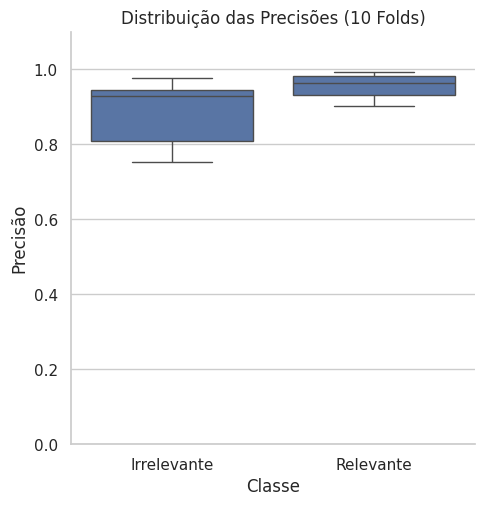

In [89]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="Precision", kind="box")
sns.despine()

plt.ylabel("Precisão")
plt.xlabel("Classe")
plt.title("Distribuição das Precisões (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

O gráfico de caixa apresenta a distribuição das precisões para as classes "Irrelevante" e "Relevante" em uma validação cruzada de 10 folds. A precisão para a classe "Irrelevante" tem uma mediana próxima de 1.0, indicando alto desempenho, mas com maior variabilidade, incluindo alguns valores abaixo de 0.8, o que sugere que em algumas execuções o modelo teve dificuldade nessa classe. Já para a classe "Relevante", a mediana da precisão é próxima de 0.9, com menor variabilidade, refletindo um desempenho mais consistente. Em geral, o modelo apresenta precisão alta e estável em ambas as classes, mas o desempenho para a classe "Irrelevante" mostra-se mais inconsistente, com maior dispersão de valores.

**Recall**

<Figure size 1200x1200 with 0 Axes>

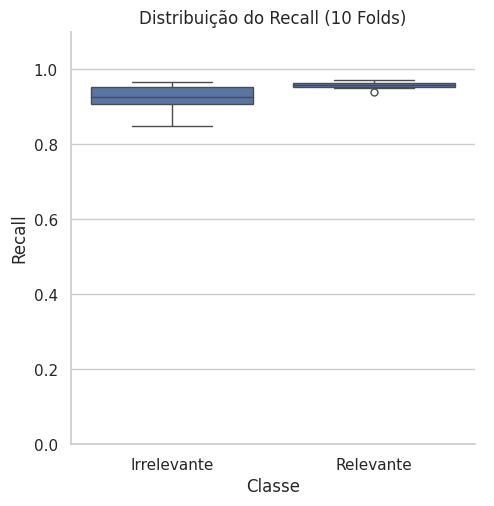

In [90]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="Recall", kind="box")
sns.despine()

plt.ylabel("Recall")
plt.xlabel("Classe")
plt.title("Distribuição do Recall (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

Para o recall, temos uma situação parecida com precision: Maior variação na classe irrelevante, mas ainda assim bons resultados em ambas as classes.

**F1-Score**

<Figure size 1200x1200 with 0 Axes>

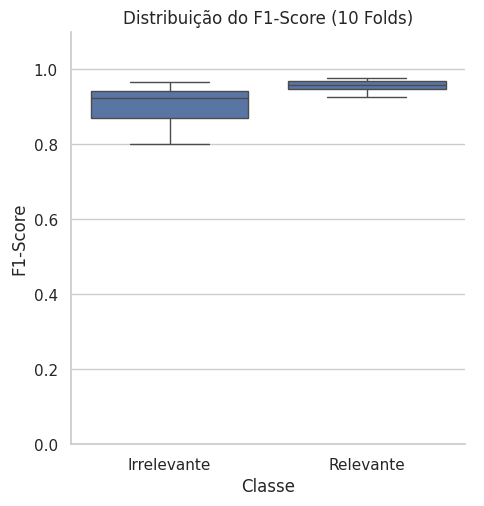

In [91]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="F1-score", kind="box")
sns.despine()

plt.ylabel("F1-Score")
plt.xlabel("Classe")
plt.title("Distribuição do F1-Score (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

**Conclusão**: Com base neste K-fold, podemos concluir que há maior variação aleatória dos resultados no que se refere à classe irrelevante, tornando-os relativamente menos confiáveis. No entanto, os resultados para ambas as classes são bons, e o modelo parece conseguir discernir a classe relevante da irrelevante.

### Treino/Teste + Kfold

Por fim, se quisermos ter uma maior confiança de que nossos resultados se generalizarão para outras amostras, podemos ainda juntar a técnica de divisão entre treino e teste com o K-fold Cross-Validation.

A vantagem de combinar métodos de validação de treino/teste com validação cruzada k-fold é obter uma estimativa mais robusta e confiável do desempenho do seu modelo. Isso é conhecido como "nested cross-validation" (validação cruzada aninhada) e envolve o uso de validação com Treino/Teste no nível mais externo para avaliar o desempenho geral do modelo e validação cruzada k-fold no nível interno para ter certeza da variabilidade com os dados de treinamento.

Aqui estão as principais vantagens de usar essa abordagem combinada:

* **Estimativa robusta do desempenho do modelo**: A validação cruzada aninhada combina a robustez da validação cruzada k-fold no treinamento do modelo com a avaliação do desempenho em divisões de treinamento/teste no nível externo. Isso ajuda a garantir que o modelo seja avaliado de maneira confiável em diferentes conjuntos de dados de teste.

* **Seleção de hiperparâmetros confiável**: No nível interno da validação cruzada k-fold, você ajusta os hiperparâmetros do modelo em várias divisões do conjunto de treinamento. Isso ajuda a escolher os melhores hiperparâmetros, tornando o modelo mais adequado e geralmente com melhor desempenho.

* **Redução de overfitting**: O uso de validação cruzada aninhada ajuda a evitar o overfitting, uma vez que o ajuste dos hiperparâmetros é feito em conjuntos de dados de treinamento diferentes em cada iteração do k-fold. Isso garante que o modelo seja mais robusto e geral.

* **Confiança na estimativa de capacidade de generalização**: A combinação de validação cruzada aninhada fornece uma estimativa mais precisa da capacidade de generalização do modelo, o que é fundamental em tarefas de previsão.

Portanto, ao usar a validação cruzada aninhada, você está obtendo uma avaliação mais robusta do desempenho do modelo e uma seleção de hiperparâmetros confiável, o que é especialmente importante em situações onde a confiabilidade da avaliação é crítica. Isso pode ser útil ao escolher entre diferentes algoritmos ou ao afinar os hiperparâmetros para garantir que seu modelo funcione bem em novos dados. Isso se tornará ainda mais importante quando chegarmos nos modelos de aprendizado profundo.

##### Divisão Treino/Teste

Vamos voltar e dividir o banco entre treino e teste:

In [92]:
# Divide os dados em features (X) e target (y)
X = df_ex['texto_processado']
y = df_ex['relevant']

# Desempacotando cada parte com o train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, # Vetor de variáveis explicativas
                                                        y, # Target (Ou Var. Dep.)
                                                        test_size=0.2, # Porcentagem que vai ficar para teste (20%)
                                                        random_state=42) # Seed para garantir a estabilidade dos resultados

#### Treinamento + KFold

Agora, diferente do exemplo anterior, teremos apenas 80% das observações para treino e, portanto, menos observações por fold:

In [93]:
for i, (train_index, test_index) in enumerate(kf.split(X_treino)):
  print(f"Dobra (Fold) {i}:")
  print(f"  Treino: tamanho={len(train_index)}")
  print(f"  Teste:  tamanho={len(test_index)}")

Dobra (Fold) 0:
  Treino: tamanho=6656
  Teste:  tamanho=740
Dobra (Fold) 1:
  Treino: tamanho=6656
  Teste:  tamanho=740
Dobra (Fold) 2:
  Treino: tamanho=6656
  Teste:  tamanho=740
Dobra (Fold) 3:
  Treino: tamanho=6656
  Teste:  tamanho=740
Dobra (Fold) 4:
  Treino: tamanho=6656
  Teste:  tamanho=740
Dobra (Fold) 5:
  Treino: tamanho=6656
  Teste:  tamanho=740
Dobra (Fold) 6:
  Treino: tamanho=6657
  Teste:  tamanho=739
Dobra (Fold) 7:
  Treino: tamanho=6657
  Teste:  tamanho=739
Dobra (Fold) 8:
  Treino: tamanho=6657
  Teste:  tamanho=739
Dobra (Fold) 9:
  Treino: tamanho=6657
  Teste:  tamanho=739


Agora, temos 6657 para treino e 739 para validação em cada uma das dobras. Vamos agora processar o X em BOW e treinar o modelo.

In [94]:
# Criando o vetorizador, utilizando nossa lista de stop_words
vectorizer = CountVectorizer(stop_words=stop_words,
                             ngram_range=(1,1)) # Palavras serão tratadas individualmente (ngram = 1)

# Transformando a coluna de texto em BOW
X_treino = vectorizer.fit_transform(X_treino)

In [95]:
# Antes, precisamos ajustar o formato de nossos inputs
Xtreino = X_treino # Só para diferenciar as duas partes do processo
ytreino = y_treino.to_numpy()  # Converter o DataFrame y em um array NumPy

# Criando um dataframe para salvar as métricas

resultados = pd.DataFrame()

# Loop de treinamento
for i, (train_index, test_index) in enumerate(kf.split(Xtreino)):

  # Dividir os dados entre treino e teste para este loop
  X_treino_kf, X_teste_kf = Xtreino[train_index, :], Xtreino[test_index, :]
  y_treino_kf, y_teste_kf = ytreino[train_index], ytreino[test_index]

  # Treinando o modelo
  modelo = LogisticRegression(random_state=42)
  modelo.fit(X_treino_kf, y_treino_kf)

  # Avaliação do modelo

  y_pred_kf = modelo.predict(X_teste_kf)

  # Guardando as métricas para esse fold

  metricas_kf = precision_recall_fscore_support(y_teste_kf,
                                                y_pred_kf,
                                                average=None,
                                                labels=[0, 1],
                                                zero_division = True)

  # Desempacotando os valores

  precisao, revocacao, f1, suporte = metricas_kf

  # Crie um dicionário com os resultados

  metricas_dict = {
      'Precision': precisao,
      'Recall': revocacao,
      'F1-score': f1,
      'Fold':i
      }

  # Criando um dataframe com esse dicionário

  metricas = pd.DataFrame(metricas_dict)

  # Convertendo o index em uma coluna
  metricas.reset_index(inplace=True)

  # Renomeando essa coluna
  metricas = metricas.rename(columns = {'index':'Classe'})

  # Fazendo o append no banco criado fora do loop

  resultados = pd.concat([metricas,resultados],axis = 0)


# Resetando o indice do banco final e dropando a coluna gerada

resultados = resultados.reset_index(drop = True)


Vamos ver os resultados do treinamento

In [96]:
resultados

,Classe,Precision,Recall,F1-score,Fold
0,0,0.927126,0.946281,0.936605,9
1,1,0.973577,0.963783,0.968655,9
2,0,0.928302,0.938931,0.933586,8
3,1,0.966245,0.960168,0.963197,8
4,0,0.929577,0.956522,0.942857,7
5,1,0.973626,0.956803,0.965142,7
6,0,0.930796,0.943860,0.937282,6
7,1,0.964444,0.955947,0.960177,6
8,0,0.970149,0.931900,0.950640,5
9,1,0.959746,0.982646,0.971061,5


Ajeitando os resultados novamente:

In [97]:
def condicao(x):
    if x == 1:
        return "Relevante"
    else:
        return "Irrelevante"


resultados['Classe'] = resultados['Classe'].apply(condicao)

Vamos verificar a precision, recall e f1-score

**Precision**

<Figure size 1200x1200 with 0 Axes>

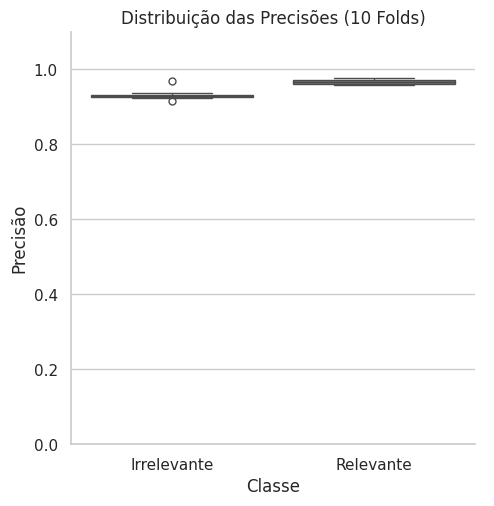

In [98]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="Precision", kind="box")
sns.despine()

plt.ylabel("Precisão")
plt.xlabel("Classe")
plt.title("Distribuição das Precisões (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

**Recall**

<Figure size 1200x1200 with 0 Axes>

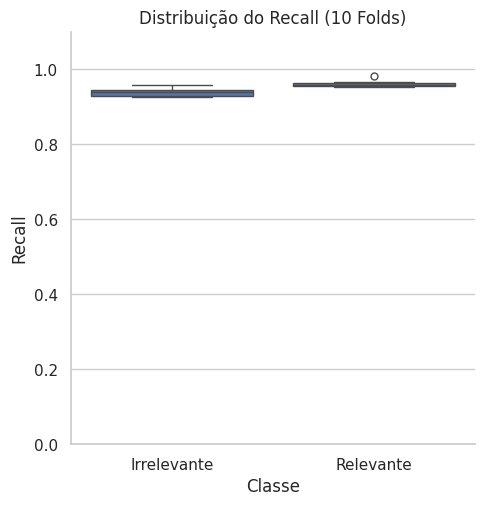

In [99]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="Recall", kind="box")
sns.despine()

plt.ylabel("Recall")
plt.xlabel("Classe")
plt.title("Distribuição do Recall (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

<Figure size 1200x1200 with 0 Axes>

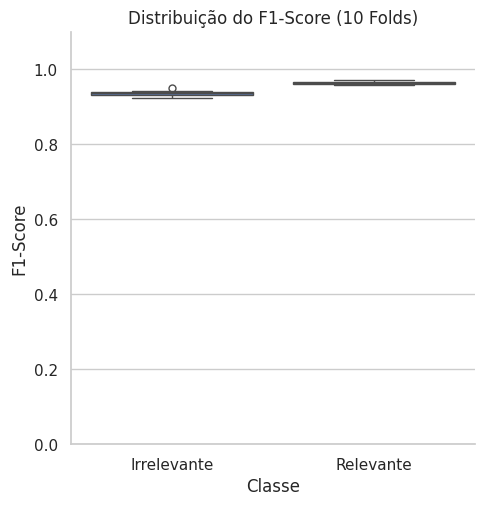

In [100]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="F1-score", kind="box")
sns.despine()

plt.ylabel("F1-Score")
plt.xlabel("Classe")
plt.title("Distribuição do F1-Score (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

Há uma menor variação no precision, mas nada drástico. Os outros resultados se mantém. Agora, vamos verificar os resultados no banco de teste. Primeiro, temos de rodar o treinamento de novo com todos os dados do banco de treino, dado que não temos um modelo salvo no sistema. (Futuramente veremos como salvar o melhor modelo das iterações e aplicar ele no banco de teste).

In [101]:
modelo = LogisticRegression() # Modelo de Regressão Logística do SkLearn

# Treinando o modelo
modelo.fit(X_treino, y_treino) # Colocamos os vetores de treino para o modelo utilizando o método '.fit'

LogisticRegression()

Prever no banco de teste

In [102]:
X_teste = vectorizer.transform(X_teste) # Transformamos o banco de teste em BOW

In [103]:
y_pred = modelo.predict(X_teste)


y_pred # Nosso array de previsões

array([1, 0, 1, ..., 1, 1, 1])

E avaliar o modelo novamente

In [104]:
rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       640
           1       0.96      0.96      0.96      1209

    accuracy                           0.95      1849
   macro avg       0.94      0.95      0.95      1849
weighted avg       0.95      0.95      0.95      1849



Vemos que os resultados obtido no banco de teste são parecidos com os obtidos no treinamento. Isso nos dá maior confiança de que os resultados são estáveis e, portanto confiáveis. Isso garante que o resultado obtido por nós não foi uma anomalia estatística, garantindo a reprodutibilidade de nossos resultados.

Hipoteticamente, poderíamos ter obtido um resultado fantástico, que nos deixasse muito otimistas. No entanto, se fosse um resultado de apenas uma iteração, esse resultado poderia ser erronêo e, quando outros pesquisadores (ou nós mesmos) fossem replicar o estudo, poderiam obter resultados muito piores, que não condizem com o que diziamos ter obtido. Por isso, é importante fazer a validação dos resultados, tanto por uma questão de reprodutibilidade dos achados quanto por uma questão de precaução, não nos deixando levar por falsos resultados.